In [47]:
import plotly.express as px
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import os
import glob
import seaborn as sn

In [28]:
colors_dict = {
    'Wind': 'steelblue',        
    'PV': 'gold',
    'Discharge': 'orangered',    
    'SOC': 'darkgreen',           
    'Charge': 'purple',
    'Consumption': 'green',          
    'Dispatchable': 'crimson',       
    'Curtailment': 'cyan'    
}

In [40]:
data = pd.read_csv('results/optimization_results_world_grid.csv')
data = data.set_index('Country')
data = data.drop(['Antarctica'], axis =0)
for col in data.columns[1:]: 
    data[f'{col}_normalized']=data[col]/data['mean_load']
    
for c in data.index.to_list(): 
    results = pd.read_pickle(f'results/{c}/optimization_results.pickle')
    data.loc[c, 'capacity_factor_wind'] = results['E_wind']/data.loc[c, 'P_wind']/8760
    data.loc[c, 'capacity_factor_pv'] = results['E_pv']/data.loc[c, 'P_pv']/8760
    data.loc[c, 'capacity_factor_dispatch'] = results['E_dispatch']/data.loc[c, 'P_dispatch']/8760
    data.loc[c, 'share_dispatchable'] = results['E_dispatch']/(results['E_wind']+results['E_pv']+results['E_dispatch'])*100
    data.loc[c, 'share_wind']=results['E_wind']/(results['E_wind']+results['E_pv']+results['E_dispatch'])*100
    data.loc[c, 'share_pv']=results['E_pv']/(results['E_wind']+results['E_pv']+results['E_dispatch'])*100
    data.loc[c, 'E_pv'] = results['E_pv']
    data.loc[c, 'E_wind'] = results['E_wind']
    folder = f'../input_time_series/{c}/'
    partie_name_file = f'grid_locations_averaged_wind_{c}_{2021}.xlsx'
    chemin_pattern = os.path.join(folder, f'*{partie_name_file}*')
    fichiers_trouves = glob.glob(chemin_pattern)
    num_loc = fichiers_trouves[0].split('_')[-7]
    data.loc[c, 'num_loc']=num_loc

In [41]:
data

,iso_alpha,mean_load,E_dispatch,P_dispatch,E_destock,P_pv,P_wind,mean_load_normalized,E_dispatch_normalized,P_dispatch_normalized,...,P_wind_normalized,capacity_factor_wind,capacity_factor_pv,capacity_factor_dispatch,share_dispatchable,share_wind,share_pv,E_pv,E_wind,num_loc
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,810.466324,1.048195e+06,1147.380843,2.398239e+06,2615.638571,1544.225466,1.0,1293.323149,1.415705,...,1.905354,0.107786,0.246219,0.104287,12.864633,17.895009,69.240357,5.641621e+06,1.458064e+06,1
Albania,ALB,833.338813,9.463228e+05,935.114592,1.980923e+06,3107.507896,1814.014819,1.0,1135.579919,1.122130,...,2.176803,0.159912,0.174821,0.115524,11.475628,30.815032,57.709340,4.758926e+06,2.541122e+06,2
Algeria,DZA,7850.452511,9.212491e+06,11203.084726,4.783740e+06,12433.290247,11260.347368,1.0,1173.498120,1.427062,...,1.434356,0.461972,0.213016,0.093872,11.813543,58.435190,29.751267,2.320077e+07,4.556920e+07,2
Angola,AGO,1114.159589,1.776980e+06,1436.186045,3.023659e+06,5198.508940,831.075936,1.0,1594.906452,1.289031,...,0.745922,0.179414,0.185640,0.141243,15.402423,11.321585,73.275992,8.453865e+06,1.306173e+06,2
Argentina,ARG,17627.853425,1.375780e+07,21449.263214,1.153815e+07,21066.854165,37723.871678,1.0,780.457923,1.216782,...,2.140015,0.361690,0.189089,0.073220,8.180508,71.070268,20.749224,3.489559e+07,1.195244e+08,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,URY,1418.965982,1.521754e+06,1941.585011,2.711955e+06,4089.080460,2176.873621,1.0,1072.438435,1.368310,...,1.534127,0.287820,0.193789,0.089471,10.907146,39.339140,49.753713,6.941586e+06,5.488556e+06,1
Malaysia,MYS,17138.120776,2.953470e+07,20631.008253,4.552323e+07,100731.621985,91991.747473,1.0,1723.333603,1.203808,...,5.367668,0.028104,0.144471,0.163421,16.438794,12.605555,70.955651,1.274822e+08,2.264772e+07,1
Malaysia,MYS,17138.120776,2.953470e+07,20631.008253,4.552323e+07,100731.621985,91991.747473,1.0,1723.333603,1.203808,...,5.367668,0.028104,0.144471,0.163421,16.438794,12.605555,70.955651,1.274822e+08,2.264772e+07,1


In [42]:
data['rate_cf']=data['capacity_factor_wind']/data['capacity_factor_pv']
data['rate_share'] = data['share_wind']/data['share_pv']
data['diff_cf']=data['capacity_factor_wind']-data['capacity_factor_pv']
data['diff_share']=data['share_wind']-data['share_pv']

In [43]:
# fig = go.Figure()
# fig.add_trace(go.Scatter(x = data['num_loc'], y=data['share_wind'],mode= 'markers', name='iso_alpha'))
# fig.update_layout(title='% Wind in electric mix vs nb locations', xaxis_title='Number of locations from Renewables ninja', yaxis_title='% Wind')
# fig.show()

<Axes: >

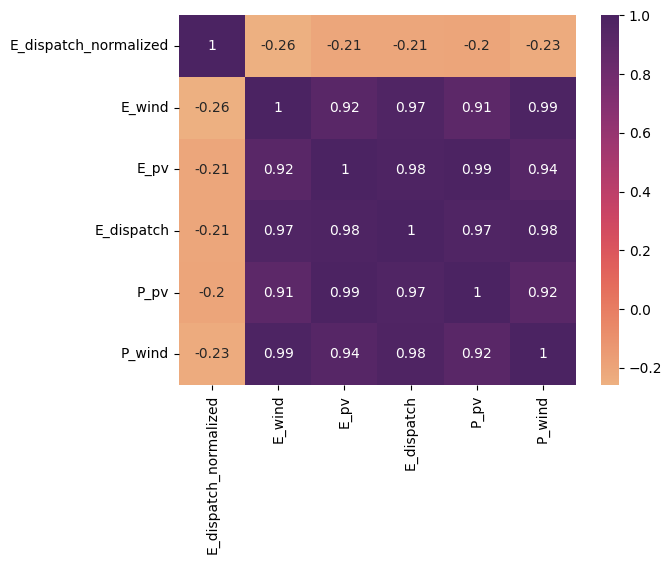

In [53]:
cols = ['E_dispatch_normalized','E_wind', 'E_pv', 'E_dispatch','P_pv', 'P_wind'] 
corr_matrix = data[cols].corr()
sn.heatmap(corr_matrix, annot =True, cmap = 'flare')

<Axes: >

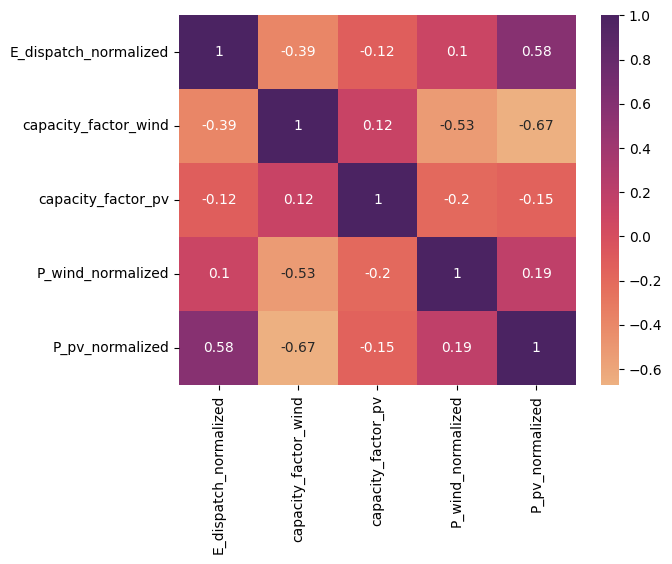

In [56]:
cols = ['E_dispatch_normalized','capacity_factor_wind', 'capacity_factor_pv', 'P_wind_normalized', 'P_pv_normalized'] 
corr_matrix = data[cols].corr()
sn.heatmap(corr_matrix, annot =True, cmap = 'flare')

<Axes: >

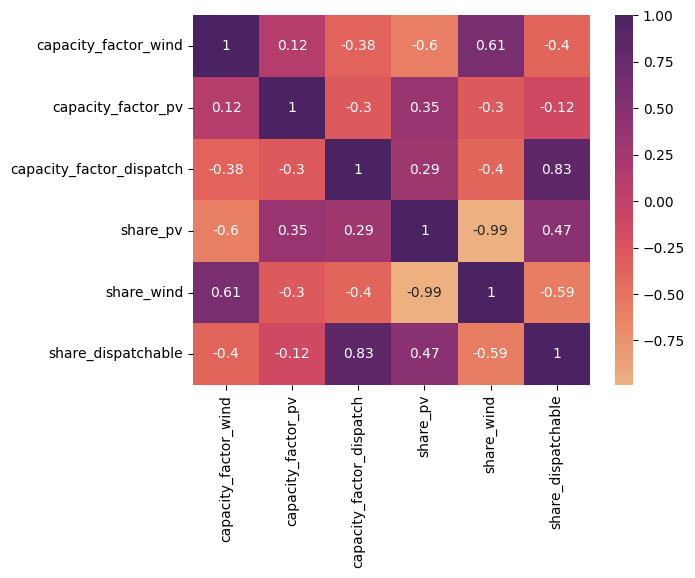

In [57]:
cols = ['capacity_factor_wind', 'capacity_factor_pv', 'capacity_factor_dispatch', 'share_pv', 'share_wind', 'share_dispatchable'] 
corr_matrix = data[cols].corr()
sn.heatmap(corr_matrix, annot =True, cmap = 'flare')

In [55]:
fig = px.choropleth(data, locations='iso_alpha', color='share_wind', hover_name='iso_alpha',
                    projection='natural earth', title='Wind energy (% of demand)', color_continuous_scale='portland',
                    hover_data={
                    'iso_alpha': True, 
                    'share_pv': True,    
                    'share_wind': True, 
                    'share_dispatchable': True 
         })
fig.show()

In [111]:
fig = px.choropleth(data, locations='iso_alpha', color='share_pv', hover_name='iso_alpha',
                    projection='natural earth', title='PV energy (% of demand)', color_continuous_scale='portland',
                    hover_data={
                    'iso_alpha': True, 
                    'share_pv': True,    
                    'share_wind': True, 
                    'share_dispatchable': True 
         })
fig.show()

In [ ]:
path_input_data = '../input_time_series/'
mode = 'grid'

In [10]:
high_wind = data[data['share_wind']>=80]
high_pv = data[(data['share_pv']>=50) & (data['share_pv']<=60)]
contrasted = data[(data['iso_alpha'] == 'COD') | (data['iso_alpha'] == 'AGO')| (data['iso_alpha'] == 'ZMB') ]
contrasted = data[(data['iso_alpha'] == 'NPL') | (data['iso_alpha'] == 'TJK') ]

In [11]:
contrasted

,iso_alpha,mean_load,E_dispatch,P_dispatch,E_destock,P_pv,P_wind,mean_load_normalized,E_dispatch_normalized,P_dispatch_normalized,E_destock_normalized,P_pv_normalized,P_wind_normalized,capacity_factor_wind,capacity_factor_pv,capacity_factor_dispatch,share_dispatchable,share_wind,share_pv,num_loc
Country,,,,,,,,,,,,,,,,,,,,
Nepal,NPL,600.457991,1.149250e+06,838.0,1.622173e+06,2499.139217,12581.251974,1.0,1913.955091,1.395601,2701.558922,4.162055,20.95276,0.007361,0.203209,0.156555,17.931077,12.657687,69.411236,1
Tajikistan,TJK,1808.218836,3.863145e+06,3319.0,5.043497e+06,6835.088019,28443.173411,1.0,2136.436920,1.835508,2789.207092,3.780012,15.72994,0.009412,0.225385,0.132871,19.606748,11.901642,68.491610,1


In [12]:
ts_to_plot = contrasted

In [13]:
fig = go.Figure()
x = pd.date_range(start='2015-01-01', end= '2015-12-31', freq = 'h')
for c in ts_to_plot.index:
    ts = pd.read_excel(f'../input_time_series/{c}/{c}_demand_Plexos_2015.xlsx', names = ['value'])
    ts = ts/ts.mean()
    fig.add_trace(go.Scatter(x = x, y=ts['value'], mode='lines', name=str(c)))
fig.update_layout(title=f'Demand time serie', xaxis_title='Time', yaxis_title='Power normalized')
fig.show()

In [14]:
fig = go.Figure()
x = pd.date_range(start='2021-01-01', end= '2021-12-31', freq = 'h')
for c in ts_to_plot.index:
    folder = f'../input_time_series/{c}/'
    partie_name_file = f'grid_locations_averaged_wind_{c}_{2021}.xlsx'
    chemin_pattern = os.path.join(folder, f'*{partie_name_file}*')
    fichiers_trouves = glob.glob(chemin_pattern)
    ts = pd.read_excel(fichiers_trouves[0], names = ['value'])
    print(ts.mean())
    fig.add_trace(go.Scatter(x = x, y=ts['value'], mode='lines', name=str(c)))
fig.update_layout(title=f'Wind time serie', xaxis_title='Time', yaxis_title='Capacity factor')
fig.show()

value    0.007361
dtype: float64
value    0.009412
dtype: float64


In [20]:
tech_data = [pd.read_csv('ninja_wind_28.2394_84.0132_uncorrected.csv', skiprows=3)]
pd.concat(tech_data).groupby('time').mean().reset_index()

TypeError: agg function failed [how->mean,dtype->object]

In [18]:
tech_data

,time,local_time,electricity
0,2023-01-01 00:00,2023-01-01 05:45,0.0
1,2023-01-01 01:00,2023-01-01 06:45,0.0
2,2023-01-01 02:00,2023-01-01 07:45,0.0
3,2023-01-01 03:00,2023-01-01 08:45,0.0
4,2023-01-01 04:00,2023-01-01 09:45,0.0
...,...,...,...
8755,2023-12-31 19:00,2024-01-01 00:45,0.0
8756,2023-12-31 20:00,2024-01-01 01:45,0.0
8757,2023-12-31 21:00,2024-01-01 02:45,0.0
8758,2023-12-31 22:00,2024-01-01 03:45,0.0


In [170]:
fig = go.Figure()
x = pd.date_range(start='2021-01-01', end= '2021-12-31', freq = 'h')
for c in ts_to_plot.index:
    folder = f'../input_time_series/{c}/'
    partie_name_file = f'grid_locations_averaged_pv_{c}_{2021}.xlsx'
    chemin_pattern = os.path.join(folder, f'*{partie_name_file}*')
    fichiers_trouves = glob.glob(chemin_pattern)
    ts = pd.read_excel(fichiers_trouves[0], names = ['value'])
    print(ts.mean())
    fig.add_trace(go.Scatter(x = x, y=ts['value'], mode='lines', name=str(c)))
fig.update_layout(title=f'PV time serie', xaxis_title='Time', yaxis_title='Capacity factor')
fig.show()

value    0.203209
dtype: float64
value    0.225385
dtype: float64
